In [1]:
#basic data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# py modules
import prepare_copy as p
import explore as e

#Stats imports
from scipy import stats
import math
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency

#sklearn split, impute, math stuff
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Scalers
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


## Load CSV <a class="tocSkip">

In [2]:
df = p.clean_df()
df.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
0,1902001,67.0,82.0,95.0,88.0,93.0,1.2,34.3,55259.0,16.4,1852.0,10656.0,10.1,18.0,65.6,22.0
1,1903001,75.0,87.0,76.0,92.0,93.0,1.3,34.5,48689.0,21.6,2056.0,11177.0,8.3,27.2,51.2,29.4
2,1904001,78.0,80.0,90.0,87.0,88.0,4.7,42.2,51538.0,15.2,2151.0,10885.0,8.8,42.2,42.6,37.0
3,1906002,82.0,80.0,100.0,100.0,96.0,2.9,48.1,58500.0,20.4,1899.0,15043.0,11.9,20.5,59.1,9.8
4,1907001,64.0,66.0,82.0,83.0,83.0,13.8,79.9,52703.0,17.4,1504.0,11129.0,12.2,22.7,59.9,20.8


In [3]:
df.corr()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
school_id,1.000000,0.005715,-0.003270,-0.004538,-0.002333,-0.012406,-0.014365,-0.052041,-0.059016,-0.042642,0.142962,0.058563,-0.141934,-0.084784,0.102443,-0.104058
english_1,0.005715,1.000000,0.832476,0.702677,0.721794,0.567064,-0.434795,-0.566804,0.030837,0.018751,0.147837,-0.159440,-0.056956,-0.286042,0.264944,0.137146
english_2,-0.003270,0.832476,1.000000,0.648409,0.817062,0.746659,-0.426149,-0.560583,0.079544,0.064513,0.161494,-0.217032,-0.002373,-0.277698,0.234203,0.141506
algebra,-0.004538,0.702677,0.648409,1.000000,0.643643,0.519039,-0.247730,-0.334292,-0.021095,0.000093,0.204670,-0.097419,-0.126999,-0.237602,0.227817,0.021673
biology,-0.002333,0.721794,0.817062,0.643643,1.000000,0.765080,-0.364884,-0.499743,0.054303,0.038545,0.199177,-0.187942,-0.052343,-0.254278,0.224617,0.073084
history,-0.012406,0.567064,0.746659,0.519039,0.765080,1.000000,-0.289671,-0.467822,0.116160,0.084718,0.127937,-0.204155,0.029041,-0.225146,0.173699,0.108696
bilingual_or_english_learner,-0.014365,-0.434795,-0.426149,-0.247730,-0.364884,-0.289671,1.000000,0.593040,0.181381,0.127291,-0.326251,-0.024918,0.191446,0.272408,-0.324388,0.044602
econdis,-0.052041,-0.566804,-0.560583,-0.334292,-0.499743,-0.467822,0.593040,1.000000,-0.048425,-0.043178,-0.226025,0.122795,0.072583,0.350291,-0.314335,-0.040042
salary,-0.059016,0.030837,0.079544,-0.021095,0.054303,0.116160,0.181381,-0.048425,1.000000,0.216543,-0.230121,-0.090416,0.223493,-0.247659,0.129969,0.382308
teacher_exp_6to10,-0.042642,0.018751,0.064513,0.000093,0.038545,0.084718,0.127291,-0.043178,0.216543,1.000000,-0.173858,-0.143909,0.208182,-0.175395,-0.329088,0.095818


In [4]:
# Copy of original
df_original = df.copy()

In [5]:
# Split data
train, val, test = e.split_data(df)
train.shape, val.shape, test.shape

((778, 16), (334, 16), (279, 16))

In [6]:
# Correlations for History STAAR test
train.corr().sort_values('english_2').english_2

econdis                        -0.546219
bilingual_or_english_learner   -0.418480
teacher_exp_0to5               -0.320049
total_expend                   -0.253371
school_id                      -0.017341
student_teacher_ratio           0.017873
salary                          0.070578
teacher_exp_6to10               0.086055
high_edu                        0.126521
extracurricular_expend          0.148891
teacher_exp_11_plus             0.261092
algebra                         0.666678
history                         0.758639
biology                         0.820704
english_1                       0.840392
english_2                       1.000000
Name: english_2, dtype: float64

In [7]:
# Average English 2 score
df.english_2.mean()

71.66642703091301

In [8]:
# Loop for all averages
columns = list(train.columns[1:])

empty_list = []

for col in columns:
    
    x = train[col].mean()
    
    empty_list.append(x)

average = pd.DataFrame({'feature': list(df.columns[1:]), 'average': empty_list})
average

,feature,average
0,english_1,67.115681
1,english_2,72.290488
2,algebra,73.232648
3,biology,82.784062
4,history,87.829049
5,bilingual_or_english_learner,12.965810
6,econdis,58.517352
7,salary,58004.344473
8,teacher_exp_6to10,19.362339
9,extracurricular_expend,710.056555


In [9]:
# Describe
train.describe().T

,count,mean,std,min,25%,50%,75%,max
school_id,778.0,1.166658e+08,7.308367e+07,1902001.0,5.790505e+07,1.019125e+08,1.789110e+08,253901001.0
english_1,778.0,6.711568e+01,1.763244e+01,10.0,5.700000e+01,6.800000e+01,8.000000e+01,100.0
english_2,778.0,7.229049e+01,1.638062e+01,0.0,6.300000e+01,7.400000e+01,8.400000e+01,100.0
algebra,778.0,7.323265e+01,1.784067e+01,0.0,6.400000e+01,7.600000e+01,8.600000e+01,100.0
biology,778.0,8.278406e+01,1.377712e+01,19.0,7.600000e+01,8.600000e+01,9.300000e+01,100.0
history,778.0,8.782905e+01,1.102602e+01,30.0,8.400000e+01,9.100000e+01,9.500000e+01,100.0
bilingual_or_english_learner,778.0,1.296581e+01,1.392269e+01,0.0,3.100000e+00,7.950000e+00,1.760000e+01,99.6
econdis,778.0,5.851735e+01,2.337060e+01,0.2,4.052500e+01,5.925000e+01,7.790000e+01,100.0
salary,778.0,5.800434e+04,5.638828e+03,30166.0,5.419300e+04,5.837100e+04,6.223225e+04,76933.0
teacher_exp_6to10,778.0,1.936234e+01,8.024472e+00,0.0,1.452500e+01,1.970000e+01,2.400000e+01,57.1


<AxesSubplot:xlabel='english_2', ylabel='Count'>

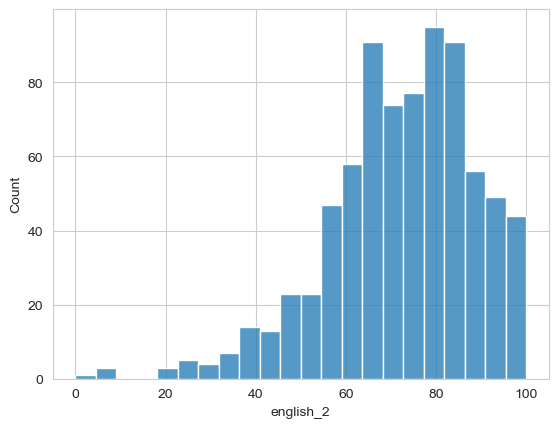

In [96]:
sns.histplot(train.english_2)

**Questions**

1. On average, do schools with a higher than average economically disadvantaged lower STAAR scores?
2. Of the schools with above average economically disadvantaged students, do the schools with higher average STAAR scores get more funding per student? 
3. Do schools with higher STAAR scores spend more per student on extra curriculars?
4. Of the schools with above average economically disadvantaged, does the school allocate less money toward extra curriculars?
5. Do schools who pay their teachers on average more than the state average have higher STAAR scores?


## Answer Q's

### 1. On average, do schools with a higher than average economically disadvantaged have lower STAAR scores?
- Average 58.5174%

In [97]:
train.econdis.mean()

58.51735218509003

In [10]:
#  above average Economically Disadvantaged
econdis_above = train[train['econdis'] >= 58.517352]

# below average Economically Disadvantaged 
econdis_below = train[train['econdis'] <= 58.517352]

econdis_above.head(5)

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1
382,57905013,33.0,35.0,26.0,56.0,59.0,37.9,95.1,63077.0,15.9,404.0,10267.0,19.4,40.4,43.8,29.6
1181,178915001,58.0,79.0,82.0,77.0,86.0,5.5,99.0,58500.0,25.2,680.0,10517.0,12.4,49.3,25.4,31.9
706,101846001,72.0,82.0,87.0,81.0,91.0,31.5,81.4,64936.0,26.2,115.0,10661.0,14.6,27.3,46.6,56.1


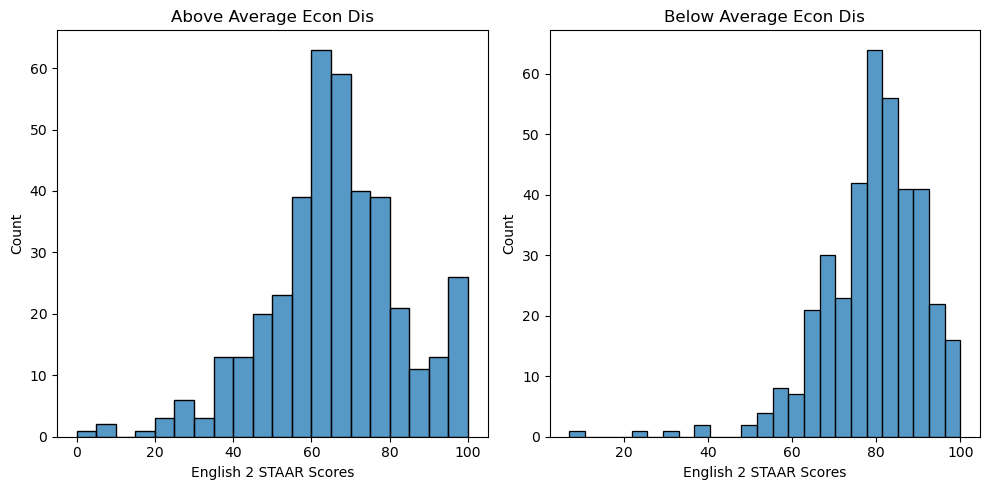

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.histplot(econdis_above.english_2, ec='black')
plt.title('Above Average Econ Dis')
plt.xlabel('English 2 STAAR Scores')
plt.ylabel('Count')

plt.subplot(122)
sns.histplot(econdis_below.english_2, ec='black')
plt.title('Below Average Econ Dis')
plt.xlabel('English 2 STAAR Scores')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- Schools that have more students that are economically disadvantaged have lower English II STAAR scores.
</div>

In [121]:
def above_below_econdis_staar(train):
    
    
'''
FIX LATER. THIS IS BROKEN.
'''
    
    # above average Economically Disadvantaged
    econdis_above = train[train['econdis'] > train.econdis.mean()]
    
    # below average Economically Disadvantaged 
    econdis_below = train[train['econdis'] <= train.econdis.mean()]
    
    # STAAR for above average economically disadvatanged
    abv_alg_avg = econdis_above['algebra']
    abv_eng1_avg = econdis_above['english_1']
    abv_eng2_avg = econdis_above['english_2']
    abv_bio_avg = econdis_above['biology']
    abv_hist_avg = econdis_above['history']
    
    # STAAR for below average economically disadvatanged
    blw_alg_avg = econdis_below['algebra']
    blw_eng1_avg = econdis_below['english_1']
    blw_eng2_avg = econdis_below['english_2']
    blw_bio_avg = econdis_below['biology']
    blw_hist_avg = econdis_below['history']
    
    # get the mean scores for above and below average economically disadvantaged groups
    above_avg_scores = [econdis_above['algebra'].mean(), econdis_above['english_1'].mean(), 
                        econdis_above['english_2'].mean(), econdis_above['biology'].mean(), 
                        econdis_above['history'].mean()]
    below_avg_scores = [econdis_below['algebra'].mean(), econdis_below['english_1'].mean(), 
                        econdis_below['english_2'].mean(), econdis_below['biology'].mean(), 
                        econdis_below['history'].mean()]
    
    # Subjects for plot
    subjects = ['Algebra', 'English 1', 'English 2', 'Biology', 'History']
    
    # create a bar plot
    width = 0.35
    fig, ax = plt.subplots()
    ax.bar(subjects, above_avg_scores, width, label='Above Average')
    ax.bar([s + width for s in subjects], below_avg_scores, width, label='Below Average')
    ax.set_ylabel('Mean Scores')
    ax.set_title('Comparison of Mean Scores for Above and Below Average Economically Disadvantaged Groups')
    ax.legend()
    plt.show()

   
    

In [146]:
def abv_avg_staar_df(train):
    
    '''
    Subsets train dataset between schools that are above average economically disadvantaged and
    schools that have less economoically disadvantaged students. 
    
    Then it calculated the average STAAR passing rate between the two subsets and inputs it into a dataframe. 
    
    Two-sample T-Test is used to very statistical significane and is included in dataframe.
    '''
    
    # Subjects
    subject=['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']
    
    # above and below average Economically Disadvantaged
    low = train[train['econdis'] <= train.econdis.mean()]
    high = train[train['econdis'] > train.econdis.mean()]
    
    low_avg_staar = [round(low.english_1.mean(),2), round(low.english_2.mean(), 2), round(low.algebra.mean(),2),
                round(low.biology.mean(),2), round(low.history.mean(),2)]
    more_avg_staar = [round(high.english_1.mean(),2), round(high.english_2.mean(),2), round(high.algebra.mean(),2),
                round(high.biology.mean(),2), round(high.history.mean(),2)]
    
    te1, pe1 = stats.ttest_ind(low.english_1, high.english_1)
    te2, pe2 = stats.ttest_ind(low.english_2, high.english_2)
    ta, pa = stats.ttest_ind(low.algebra, high.algebra)
    tb, pb = stats.ttest_ind(low.biology, high.biology)
    th, ph = stats.ttest_ind(low.history, high.history)
    
    pval = [pe1, pe2, pa, pb, ph]
    
    data = pd.DataFrame(index=subject,data={
        'Above Average': more_avg_staar,
        'Below Average': low_avg_staar,
        'p-value': pval
    }
                      )
    return data

In [147]:
abv_avg_staar_df(train)

,Above Average,Below Average,p-value
English 1,59.33,75.19,4.790567e-40
English 2,65.54,79.29,1.439728e-34
Algebra,68.30,78.35,1.183526e-15
Biology,77.66,88.10,5.583533e-28
U.S. History,84.18,91.61,3.802130e-22


In [218]:
def viz_abv_avg_staar():
    
    ma = abv_avg_staar_df(train)

    plt.figure(figsize=(10,5))
    X = ['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']

    X_axis = np.arange(len(X))

    plt.bar(X_axis[0] - 0.1, ma['Above Average'][0], 0.2, label = 'Above Average', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0.1, ma['Below Average'][0], 0.2, label = 'Below Average', color=['orange'], ec='black')

    plt.bar(X_axis[1] - 0.1, ma['Above Average'][1], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[1] + 0.1, ma['Below Average'][1], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[2] - 0.1, ma['Above Average'][2], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[2] + 0.1, ma['Below Average'][2], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[3] - 0.1, ma['Above Average'][3], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[3] + 0.1, ma['Below Average'][3], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[4] - 0.1, ma['Above Average'][4], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[4] + 0.1, ma['Below Average'][4], 0.2, color=['orange'], ec='black')

    
    ax = plt.gca()
    
    # Amount above bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.0f}'.format(height), (p.get_x()+p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.xticks(X_axis, X)
    plt.xlabel("Subject")
    plt.ylabel("Percent Passing")
    plt.title("STAAR Passing Rate for Economically Disadvantaged")
    plt.ylim(20, 95)
    plt.grid(True, alpha=0.3, linestyle='--')
    leg = plt.legend(title="Economically Disadvantaged")
    leg._legend_box.align = "left"
    plt.show()

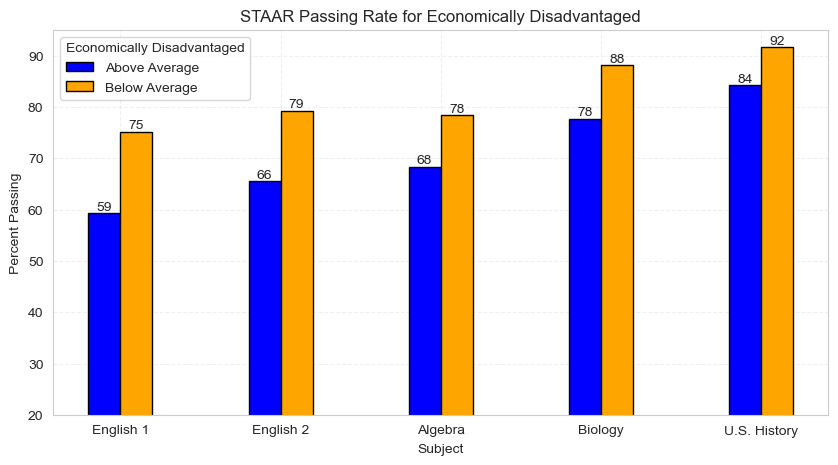

In [219]:
viz_abv_avg_staar()

### Of the schools with above average economically disadvantaged students, do the schools with higher average STAAR scores get more funding per student? 

In [87]:
train.econdis.mean()

58.51735218509003

In [88]:
#  above average Economically Disadvantaged
econdis_above = train[train['econdis'] >= 58.517352]

In [89]:
# Average STAAR score for schools with above average Econ Dis
econdis_above.english_2.mean()

65.54040404040404

In [90]:
# Above average STAAR score for above average Econ Dis schools
above_avg_econdis_eng2 = econdis_above[econdis_above['english_2'] > 65.54040404040404]

# Below average STAAR score for above average Econ Dis schools
below_avg_econdis_eng2 = econdis_above[econdis_above['english_2'] <= 65.54040404040404]

In [91]:
# Total expenditure for above_avg_econdis_eng2
avg_expend_above_staar = above_avg_econdis_eng2['total_expend'].mean()

# Total expenditure for below_avg_econdis_eng2
avg_expend_below_staar = below_avg_econdis_eng2['total_expend'].mean()

In [92]:
avg_expend_above_staar, avg_expend_below_staar

(9498.323383084577, 10665.835897435898)

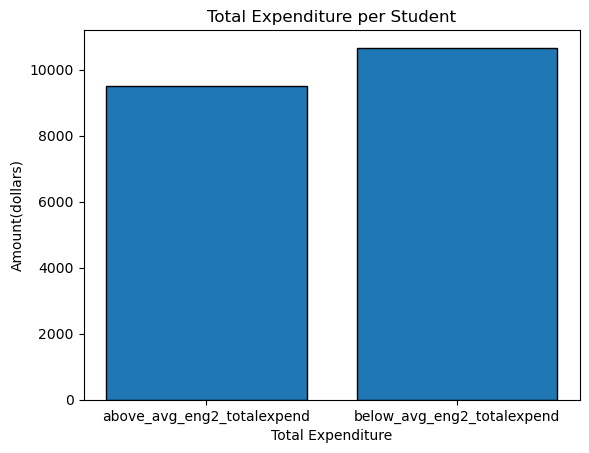

In [18]:
data = pd.DataFrame({'feature': ['above_avg_eng2_totalexpend', 'below_avg_eng2_totalexpend'],
                     'amount': [avg_expend_above, avg_expend_below]})

plt.bar(data['feature'], data['amount'], ec='black')
plt.xlabel('Total Expenditure')
plt.ylabel('Amount(dollars)')
plt.title('Total Expenditure per Student')
plt.show()

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- Schools with higher than average STAAR scores actually get less funding per student.
</div>

In [165]:
def above_avg_econdis_total_expend(train):
    
    # Above average Economically Disadvantaged
    econdis_above_avg = train[train['econdis'] >= train['econdis'].mean()]
    
    above = []
    below = []
    p_val = []
    
    subject_list = ['algebra','english_1','english_2','biology','history']
    
    for s in subject_list:
    
        # Above and Below avg STAAR passing rate
        above_avg_staar = econdis_above_avg[econdis_above_avg[s] > econdis_above_avg[s].mean()]
        below_avg_staar = econdis_above_avg[econdis_above_avg[s] <= econdis_above_avg[s].mean()]
        
        # Total expenditure for above_avg_staar and below_average_staar
        avg_expend_above = above_avg_staar['total_expend'].mean()
        avg_expend_below = below_avg_staar['total_expend'].mean()
    
        # Above and Below total expenditures for stats test
        above_stats = above_avg_staar['total_expend']
        below_stats = below_avg_staar['total_expend']
    
        # Stats 2-Sample T-Test
        t, p = stats.ttest_ind(below_stats, above_stats)
    
        above.append(avg_expend_above)
        below.append(avg_expend_below)
        p_val.append(p)
        
        
    
    # Subjects for plot
    subjects = ['Algebra', 'English 1', 'English 2', 'Biology', 'History']
    
    df = pd.DataFrame(index=subjects, data={
        'Above Average': above,
        'Below Average': below,
        'p-value': p_val})
  

    return df

In [166]:
above_avg_econdis_total_expend(train)

,Above Average,Below Average,p-value
Algebra,9960.708134,10199.000000,0.644084
English 1,9763.162921,10326.412844,0.276248
English 2,9498.323383,10665.835897,0.022970
Biology,9732.004525,10504.160000,0.135932
History,9398.793103,11027.323171,0.001723


In [203]:
def viz_econdis_total_expend():
    
    ma = above_avg_econdis_total_expend(train)

    plt.figure(figsize=(10,5))
    X = ['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']

    X_axis = np.arange(len(X))

    plt.bar(X_axis[0] - 0.1, ma['Above Average'][0], 0.2, label = 'Above Average', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0.1, ma['Below Average'][0], 0.2, label = 'Below Average', color=['orange'], ec='black')

    plt.bar(X_axis[1] - 0.1, ma['Above Average'][1], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[1] + 0.1, ma['Below Average'][1], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[2] - 0.1, ma['Above Average'][2], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[2] + 0.1, ma['Below Average'][2], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[3] - 0.1, ma['Above Average'][3], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[3] + 0.1, ma['Below Average'][3], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[4] - 0.1, ma['Above Average'][4], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[4] + 0.1, ma['Below Average'][4], 0.2, color=['orange'], ec='black')

    
    # Amount above bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.0f}'.format(height), (p.get_x()+p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=12)

    plt.xticks(X_axis, X)
    plt.xlabel("Subject")
    plt.ylabel("Amount($)")
    plt.title("Total Expenditure for Economically Disadvantaged Schools")
    plt.ylim(2000, 14000)
    plt.grid(True, alpha=0.3, linestyle='--')
    leg = plt.legend(title="STAAR Passing Rate")
    leg._legend_box.align = "left"
    plt.show()

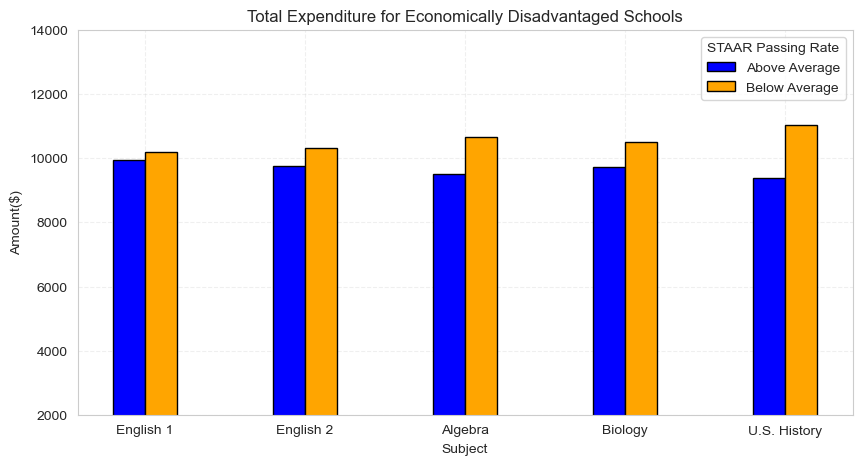

In [204]:
viz_econdis_total_expend()

#### Stats Test

In [19]:
# Dos Sample T-Test
stats.ttest_ind(above_avg_econdis_eng2['total_expend'],below_avg_econdis_eng2['total_expend'])

Ttest_indResult(statistic=-2.2828773822190116, pvalue=0.02296958063492141)

In [66]:
stats.ttest_ind(below_avg_econdis_eng2['total_expend'],above_avg_econdis_eng2['total_expend'], \
                alternative='greater')


Ttest_indResult(statistic=2.2828773822190116, pvalue=0.011484790317460705)

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- P-value is lower than 0.05. Total expediture per student for schools that have a higher than average economically disadvanataged is significant. 
</div>

### Do schools with higher STAAR scores spend more per student on extra curriculars?

In [20]:
# Subset for higher and lower than average English II STAAR scores
above_avg_eng2 = train[train['english_2'] > train.english_2.mean()]
below_avg_eng2 = train[train['english_2'] <= train.english_2.mean()]

In [21]:
# Subset for higher and lower than average English II STAAR scores and their average extra curr expenditures
above_avg_eng2_extracurr = above_avg_eng2['extracurricular_expend'].mean()
below_avg_eng2_extracurr = below_avg_eng2['extracurricular_expend'].mean()

above_avg_eng2_extracurr, below_avg_eng2_extracurr

(786.6310679611651, 623.8579234972677)

In [22]:
xx = pd.DataFrame({'feature': ['above_avg_staar', 'below_avg_staar'],
              'avg_amount':[above_avg_eng2_extracurr, below_avg_eng2_extracurr] })
xx

,feature,avg_amount
0,above_avg_staar,786.631068
1,below_avg_staar,623.857923


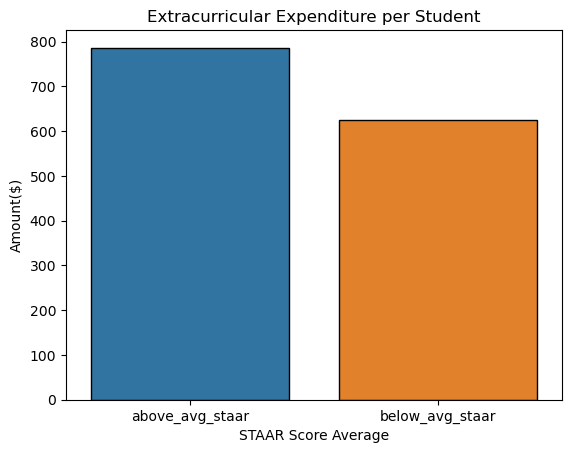

In [23]:
sns.barplot(x = xx['feature'], y = xx['avg_amount'], ec= 'black')
plt.xlabel('STAAR Score Average')
plt.ylabel('Amount($)')
plt.title('Extracurricular Expenditure per Student')
plt.show()

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- Schools with higher than average STAAR scores get around $150 more funding per student for extra curriculars.
</div>

#### Stats Test

In [24]:
stats.ttest_ind(above_avg_eng2['extracurricular_expend'],below_avg_eng2['extracurricular_expend'])

Ttest_indResult(statistic=3.455328532374792, pvalue=0.0005794825188388211)

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- P-value is less than 0.05, thus it is significant. 
</div>

### 4. Do schools allocate less money for extra curriculars to schools that have an above average economically disadvantaged student population?

In [25]:
#  above average Economically Disadvantaged
econdis_above_avg = train[train['econdis'] > train['econdis'].mean()]

# below average Economically Disadvantaged 
econdis_below_avg = train[train['econdis'] <= train['econdis'].mean()]

In [26]:
# Average extra currs per student 
econdis_above_extracurr = econdis_above_avg['extracurricular_expend'].mean()
econdis_below_extracurr = econdis_below_avg['extracurricular_expend'].mean()

econdis_above_extracurr, econdis_below_extracurr

(552.310606060606, 873.5837696335078)

In [27]:
# Average total expenditure per student
econdis_above_total = econdis_above_avg['total_expend'].mean()
econdis_below_total = econdis_below_avg['total_expend'].mean()

econdis_above_total, econdis_below_total

(10073.234848484848, 9553.201570680629)

In [28]:
round(552.3/10073.23,4), round(873.58/9553.2,4)

(0.0548, 0.0914)

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- Schools that are less economically disadvantaged allocate more than $300 per student for extra curriculars compared to schools with a higher economically disadvantaged population. Also, schools that are less economically dis
</div>

In [29]:
extracurr_totalexpend = pd.DataFrame({'feature': ['above_avg_econdis','below_avg_econdis'],
                                  'amount_avg_extracurr': [econdis_above_extracurr, econdis_below_extracurr],
                                  'amount_avg_totalexpend': [econdis_above_total,econdis_below_total]})
extracurr_totalexpend

,feature,amount_avg_extracurr,amount_avg_totalexpend
0,above_avg_econdis,552.310606,10073.234848
1,below_avg_econdis,873.583770,9553.201571


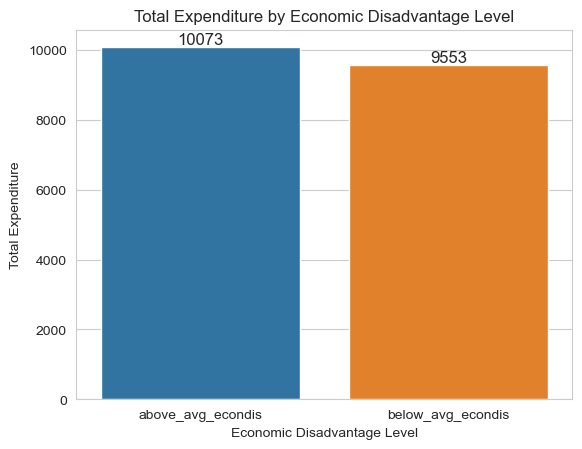

In [30]:
sns.set_style('whitegrid')

# Create bar plot
ax = sns.barplot(x='feature', y='amount_avg_totalexpend', data=extracurr_totalexpend)

# Set labels
ax.set(xlabel='Economic Disadvantage Level', ylabel='Total Expenditure',
       title='Total Expenditure by Economic Disadvantage Level')

# Add values above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.0f}'.format(height), (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom', fontsize=12)

plt.show()

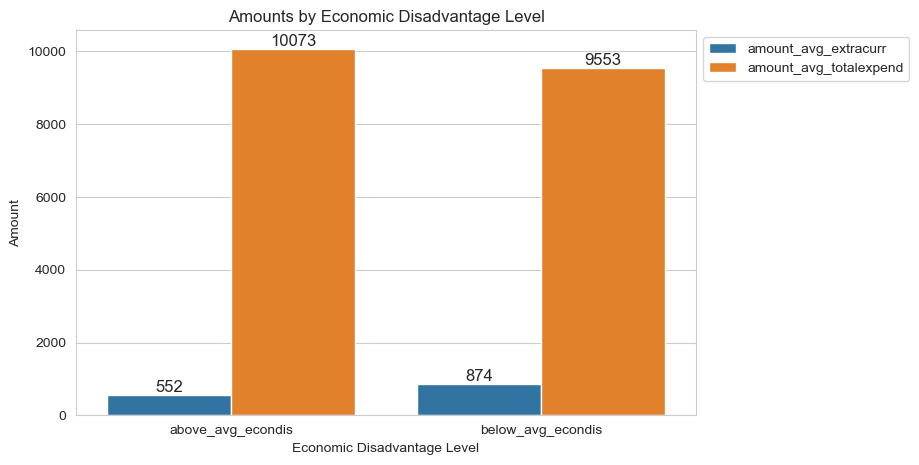

In [31]:
sns.set_style('whitegrid')

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar plot
ax = sns.barplot(x='feature', y='value', hue='variable', 
                 data=pd.melt(extracurr_totalexpend, id_vars=['feature'], var_name='variable', value_name='value'))

# Set labels
ax.set(xlabel='Economic Disadvantage Level', ylabel='Amount',
       title='Amounts by Economic Disadvantage Level')

# Amount above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate('{:.0f}'.format(height), (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom', fontsize=12)

# Reposition legend
ax.legend(bbox_to_anchor=(1, 1))    

plt.show()

In [32]:
pd.melt(extracurr_totalexpend, id_vars=['feature'], var_name='variable', value_name='value')

,feature,variable,value
0,above_avg_econdis,amount_avg_extracurr,552.310606
1,below_avg_econdis,amount_avg_extracurr,873.583770
2,above_avg_econdis,amount_avg_totalexpend,10073.234848
3,below_avg_econdis,amount_avg_totalexpend,9553.201571


#### Stats Test

In [33]:
stats.ttest_ind(econdis_above_avg['extracurricular_expend'],econdis_below_avg['extracurricular_expend'] )

Ttest_indResult(statistic=-6.988935245558356, pvalue=5.97064480146544e-12)

<div class="alert alert-block alert-info"> 
**Takeaways**
    
- P-value is lower than 0.05. Statistically significant.
</div>

## Modeling

In [34]:
train.head(2)

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1


### Trains<a class="tocSkip">

In [35]:
X_train = train.drop(['english_2', 'english_1','algebra','biology','history','school_id'], axis=1)
y_train = train['english_2']

X_validate = val.drop(['english_2', 'english_1','algebra','biology','history','school_id'], axis=1)
y_validate = val['english_2']

X_test = test.drop(['english_2', 'english_1','algebra','biology','history','school_id'], axis=1)
y_test = test['english_2']

### Scale Data

In [36]:
# Scaler Object
mm= MinMaxScaler()

In [37]:
# Scale the stuff
X_train_scaled = mm.fit_transform(X_train)
X_validate_scaled = mm.transform(X_validate)
X_test_scaled = mm.transform(X_test)

### RFE

In [38]:
# Model Object
lm = LinearRegression()

In [39]:
# RFE Object
rfe = RFE(lm, n_features_to_select=2)

In [40]:
# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train_scaled,y_train)  

In [41]:
#Fitting the data to model
lm.fit(X_rfe,y_train)

LinearRegression()

In [42]:
# retrieving best features
ranks = rfe.ranking_

In [43]:
# Columns
columns = X_train.columns.tolist()

In [44]:
# DF for rankings
feature_rankings = pd.DataFrame({'feature':columns, 'ranking':ranks})

feature_rankings.sort_values('ranking')

,feature,ranking
7,teacher_exp_0to5,1
8,teacher_exp_11_plus,1
3,teacher_exp_6to10,2
5,total_expend,3
1,econdis,4
0,bilingual_or_english_learner,5
9,high_edu,6
4,extracurricular_expend,7
2,salary,8
6,student_teacher_ratio,9


## Baseline

In [45]:
# Baseline will be the mean of STAAR scores
train.english_2.mean()

72.29048843187661

In [46]:
train_baseline = train.copy()

In [47]:
train_baseline['baseline'] = train.english_2.mean()

In [48]:
train_baseline.head()

,school_id,english_1,english_2,algebra,biology,history,bilingual_or_english_learner,econdis,salary,teacher_exp_6to10,extracurricular_expend,total_expend,student_teacher_ratio,teacher_exp_0to5,teacher_exp_11_plus,high_edu,baseline
404,57905088,98.0,100.0,100.0,100.0,100.0,30.5,87.9,69483.0,26.9,38.0,7558.0,19.2,22.4,50.7,44.8,72.290488
429,57912005,45.0,47.0,79.0,94.0,75.0,47.5,85.4,63990.0,20.2,13.0,24531.0,5.9,51.9,27.9,31.1,72.290488
621,81902002,69.0,79.0,74.0,86.0,93.0,4.5,53.5,56116.0,5.2,1071.0,9636.0,11.3,29.7,65.2,22.8,72.290488
1090,161918001,81.0,71.0,63.0,82.0,89.0,0.0,34.1,54056.0,13.0,2818.0,21893.0,8.3,28.2,58.8,23.7,72.290488
598,75908001,90.0,90.0,96.0,100.0,96.0,2.8,29.2,46058.0,20.5,532.0,10824.0,7.3,45.2,34.2,20.5,72.290488


In [49]:
def baseline_mean_errors(y):
    '''
    Takes in the target variable(y) and sets a baseline. Then calculates the SSE, MSE, and RMSE of the baseline.
    y = target
    '''
    baseline = np.repeat(y.mean(), len(y))
    
    mse= mean_squared_error(y, baseline)
    sse = mse * len(y)
    rmse = mean_squared_error(y, baseline, squared=False)

    print(f'''
        Baseline Mean Errors
        -----------------
        SSE: {sse}
        MSE: {mse}
        RMSE: {rmse}''')

    return sse, mse, rmse

In [50]:
sse, mse, base_rmse = baseline_mean_errors(train.english_2)


        Baseline Mean Errors
        -----------------
        SSE: 208488.3496143959
        MSE: 267.979883823131
        RMSE: 16.370091136677615


In [51]:
train_baseline['baseline'] = base_rmse

In [52]:
train_baseline[['baseline']].head()

,baseline
404,16.370091
429,16.370091
621,16.370091
1090,16.370091
598,16.370091


<div class="alert alert-block alert-info"> 
Baseline is 16.37
</div>

## Linear Regression

In [53]:
# Model Object
lm = LinearRegression(normalize=True)

# Fit Object
lm.fit(X_train_scaled, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [54]:
# Dataframe y_train
y_train_df = pd.DataFrame(y_train)

# Predict Train
y_train_df['preds_lm_train'] = lm.predict(X_train_scaled)


In [55]:
y_train_df.head(4)

,english_2,preds_lm_train
404,100.0,66.562988
429,47.0,43.544317
621,79.0,73.670980
1090,71.0,73.550218


In [56]:
y_train_df['baseline_rmse'] = base_rmse

In [57]:
def regression_errors(y, yhat):
    '''
    Takes in the target variable and the yhat(predictions) and calulates the SSE, MSE, RMSE, ESS, and TSS regression errors
    '''
    mse = mean_squared_error(y, yhat)
    rmse = mean_squared_error(y, yhat, squared=False)
    sse= mse * len(y)
    ess = yhat-y.mean()
    ess = ess ** 2
    ess = ess.sum()
    tss = ess + sse

    return sse, mse, rmse, ess, tss


In [58]:
sse, mse, train_rmse, ess, tss = regression_errors(y_train, y_train_df.preds_lm_train)

train_rmse

12.825527757896593

### Train RMSE vs Baseline DF

In [59]:
y_train_df['lm_train_rmse'] = train_rmse

y_train_df.head()

,english_2,preds_lm_train,baseline_rmse,lm_train_rmse
404,100.0,66.562988,16.370091,12.825528
429,47.0,43.544317,16.370091,12.825528
621,79.0,73.670980,16.370091,12.825528
1090,71.0,73.550218,16.370091,12.825528
598,90.0,77.190142,16.370091,12.825528


### Validate RMSE vs Baseline DF

In [60]:
# Validate DF
y_validate_df = pd.DataFrame(y_validate)

# Predict Train
y_validate_df['preds_lm_val'] = lm.predict(X_validate_scaled)

# Baseline RMSE
y_validate_df['baseline_rmse'] = base_rmse

# Regression Errors for Validate set
sse, mse, val_rmse, ess, tss = regression_errors(y_validate, y_validate_df.preds_lm_val)

# RMSE for Validate predictions
y_validate_df['lm_validate_rmse'] = val_rmse

y_validate_df.head(5)

,english_2,preds_lm_val,baseline_rmse,lm_validate_rmse
578,86.0,63.770033,16.370091,12.618093
771,40.0,56.935598,16.370091,12.618093
1291,66.0,65.483152,16.370091,12.618093
162,80.0,59.838308,16.370091,12.618093
333,32.0,54.530486,16.370091,12.618093


## Polynomial Regression 

In [61]:
# Polynomial Feature Object
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled 
X_validate_degree2 = pf.transform(X_validate_scaled)


### Train RMSE

In [62]:
# Model Object
lm2 = LinearRegression(normalize=True)

# Fit the model
lm2.fit(X_train_degree2, y_train)

# Predict train and add to y_train_df
y_train_df['preds_pf'] = lm2.predict(X_train_degree2)


# Regression Errors for Validate set
sse, mse, train_pf_rmse, ess, tss = regression_errors(y_train, y_train_df.preds_pf)

# RMSE for Validate predictions
y_train_df['pf_train_rmse'] = train_pf_rmse

y_train_df.head()


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


,english_2,preds_lm_train,baseline_rmse,lm_train_rmse,preds_pf,pf_train_rmse
404,100.0,66.562988,16.370091,12.825528,71.280933,11.202263
429,47.0,43.544317,16.370091,12.825528,50.670818,11.202263
621,79.0,73.670980,16.370091,12.825528,73.370783,11.202263
1090,71.0,73.550218,16.370091,12.825528,98.227819,11.202263
598,90.0,77.190142,16.370091,12.825528,75.995815,11.202263


### Validate RMSE

In [63]:
# Predict train and add to y_train_df
y_validate_df['preds_pf'] = lm2.predict(X_validate_degree2)

# Regression Errors for Validate set
sse, mse, val_pf_rmse, ess, tss = regression_errors(y_validate, y_validate_df.preds_pf)

# RMSE for Validate predictions
y_validate_df['pf_validate_rmse'] = val_pf_rmse

y_validate_df.head()

,english_2,preds_lm_val,baseline_rmse,lm_validate_rmse,preds_pf,pf_validate_rmse
578,86.0,63.770033,16.370091,12.618093,89.941315,13.645745
771,40.0,56.935598,16.370091,12.618093,53.741074,13.645745
1291,66.0,65.483152,16.370091,12.618093,56.738801,13.645745
162,80.0,59.838308,16.370091,12.618093,50.948946,13.645745
333,32.0,54.530486,16.370091,12.618093,65.400533,13.645745


## Tweedie Regressor

In [ ]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.G3)

# predict train
y_train['G3_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.G3, y_train.G3_pred_glm)**(1/2)

# predict validate
y_validate['G3_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.G3, y_validate.G3_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


In [216]:
def viz_econdis_total_expend():
    
    ma = above_avg_econdis_total_expend(train)

    plt.figure(figsize=(10,5))
    X = ['English 1', 'English 2', 'Algebra', 'Biology', 'U.S. History']

    X_axis = np.arange(len(X))

    plt.bar(X_axis[0] - 0.1, ma['Above Average'][0], 0.2, label = 'Above Average', color=['blue'], ec='black')
    plt.bar(X_axis[0] + 0.1, ma['Below Average'][0], 0.2, label = 'Below Average', color=['orange'], ec='black')

    plt.bar(X_axis[1] - 0.1, ma['Above Average'][1], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[1] + 0.1, ma['Below Average'][1], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[2] - 0.1, ma['Above Average'][2], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[2] + 0.1, ma['Below Average'][2], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[3] - 0.1, ma['Above Average'][3], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[3] + 0.1, ma['Below Average'][3], 0.2, color=['orange'], ec='black')

    plt.bar(X_axis[4] - 0.1, ma['Above Average'][4], 0.2, color=['blue'], ec='black')
    plt.bar(X_axis[4] + 0.1, ma['Below Average'][4], 0.2, color=['orange'], ec='black')

    ax = plt.gca()
    
    # Amount above bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate('{:.0f}'.format(height), (p.get_x()+p.get_width()/2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.xticks(X_axis, X)
    plt.xlabel("Subject")
    plt.ylabel("Amount($)")
    plt.title("Total Expenditure for Economically Disadvantaged Schools")
    plt.ylim(2000, 14000)
    plt.grid(True, alpha=0.3, linestyle='--')
    leg = plt.legend(title="STAAR Passing Rate")
    leg._legend_box.align = "left"
    plt.show()

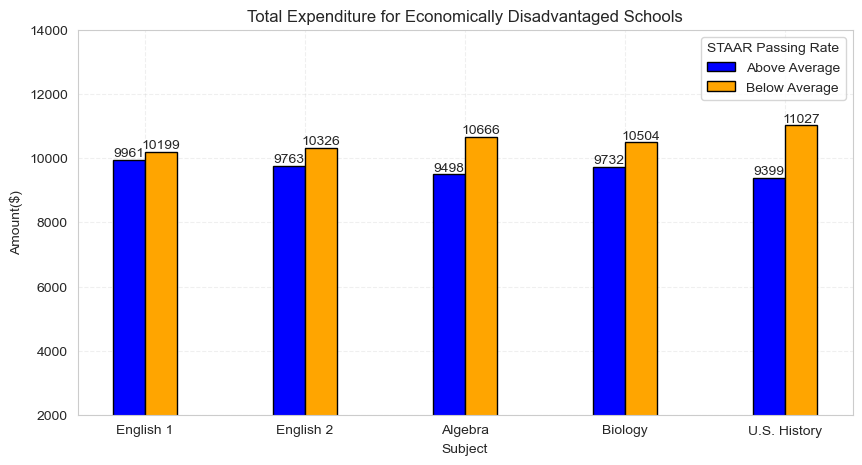

In [217]:
viz_econdis_total_expend()